Análise de Inadinplência de Clientes

Obejtivo: 
Este projeto tem como foco analisar dados de clientes de uma instituição financeira para entender melhor os fatores que influenciam a inadimplência. Através da exploração e visualização dos dados, buscamos identificar padrões e características que diferenciem os clientes adimplentes dos inadimplentes.

A análise passa por etapas de limpeza, transformação e segmentação dos dados, utilizando ferramentas como Pandas, Seaborn e Matplotlib. Ao final, o objetivo é extrair insights relevantes que possam apoiar estratégias de crédito mais eficientes.



In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/base-de-dados-inadimplentes/Python_M10_support material.csv


# Exploração e manipulação dos dados

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("/kaggle/input/base-de-dados-inadimplentes/Python_M10_support material.csv", na_values = 'na')

In [25]:
display(df)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


# Estrutura da base

In [26]:
#Verificação da quantidade de linhas e colunas do arquivo base
df.shape 

(10127, 16)

In [27]:
# Filtrando a base para verificação de quantos adimplentes temos
df[df['default']==0].shape

(8500, 16)

In [28]:
# Filtrando a base para verificação de quantos inadimplentes temos
df[df['default']==1].shape

(1627, 16)

In [29]:
qtde_total,_ = df.shape #Usando ,_ psra sinalizar que qtde total vai receber o número de linhas
qtde_adimplentes,_ = df[df['default']==0].shape
qtde_inadimplentes,_ = df[df['default']==1].shape

In [30]:
print(f"Total de clientes: {qtde_total}")
print(f"Adimplentes: {qtde_adimplentes} ({qtde_adimplentes / qtde_total:.2%})")
print(f"Inadimplentes: {qtde_inadimplentes} ({qtde_inadimplentes / qtde_total:.2%})")

Total de clientes: 10127
Adimplentes: 8500 (83.93%)
Inadimplentes: 1627 (16.07%)


# Schema da base de dados

In [31]:
display(df.head(3))

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20


In [32]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### Atributos categoricos da base

In [33]:
df.select_dtypes('object').describe().transpose()


,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


### Atriutos numericos da base

In [34]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


# Tratamento da base

## Tratando dados faltantes

In [35]:
faltantes = df.isna().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)
display(faltantes.to_frame(name='Total de Faltantes'))

,Total de Faltantes
escolaridade,1519
salario_anual,1112
estado_civil,749


In [36]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtde,_ = df[df[col].isna()].shape
            total,_ = df.shape
            dict_dados_faltantes = {col: {'quantidade':qtde, 'porcentagem': round(100*qtde/total,2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)
    for stat in stats_dados_faltantes:
        print(stat)

In [37]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [38]:
stats_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


In [39]:
stats_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


# Processo de Transformação e limpeza de dados

In [40]:
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [41]:
df[['limite_credito','valor_transacoes_12m']].head(3)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"


In [42]:
ajuste = lambda X: float(X.replace(".","").replace(",","."))

# Teste da função lambda
valores_base = ['12.691,51','8.256,96', '3.418,56']
valores_ajustados = list(map(ajuste, valores_base))

print(valores_ajustados)

[12691.51, 8256.96, 3418.56]


In [43]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda X: float(X.replace(".","").replace(",",".")))
df['limite_credito'] = df['limite_credito'].apply(ajuste)

In [44]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [45]:
#Verificando atributos categoricos

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [46]:
# Verificando atributos numéricos

df.drop('id',axis = 1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## Limpando dados como N/A

In [47]:
df.dropna(inplace=True)

In [48]:
df.shape

(7081, 16)

In [49]:
df[df['default']==0].shape


(5968, 16)

In [50]:
df[df['default']==1].shape

(1113, 16)

In [51]:
qtde_total_novo,_ = df.shape #Usando ,_ psra sinalizar que qtde total vai receber o número de linhas
qtde_adimplentes_novo,_ = df[df['default']==0].shape
qtde_inadimplentes_novo,_ = df[df['default']==1].shape

In [52]:
print(f"A proporção adimplentes ativos é de {round(100* qtde_adimplentes/qtde_total,2)}%")
print(f"A nova proporção de clientes adimplentes é de {round(100* qtde_adimplentes_novo/qtde_total_novo,2)}%")

print("")
print(f"A proporção ativa de clientes inadimplentes é de {round(100* qtde_inadimplentes_novo/qtde_total_novo,2)}%")
print(f"A nova proporção de clientes inadimplentes é de {round(100* qtde_inadimplentes/qtde_total,2)}%")

A proporção adimplentes ativos é de 83.93%
A nova proporção de clientes adimplentes é de 84.28%

A proporção ativa de clientes inadimplentes é de 15.72%
A nova proporção de clientes inadimplentes é de 16.07%


# Visualização de dados

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [54]:
# base só de inadimplente

df_adimplentes = df[df["default"]==0]

In [55]:
df_inadimplentes = df[df["default"]==1]

In [56]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


## Criando uma funão para visualizar as prorpeidades categoricas

In [57]:
#Colocando o codigo de geração de visuais dentro de uma função para facilitar novos usos

def plotar_coluna(coluna, dfs, titulos):
    num = len(dfs)
    fig, axes = plt.subplots(1, num, figsize=(20, 5), sharex=True)
    max_y = 0

    for ax, df_, titulo in zip(axes if num > 1 else [axes], dfs, titulos):
        vc = df_[coluna].value_counts(dropna=False)
        df_plot = vc.reset_index()
        df_plot.columns = [coluna, 'contagem']

        try:
            df_plot = df_plot.sort_values(by=coluna)
        except Exception:
            pass

        sns.barplot(data=df_plot, x=coluna, y='contagem', ax=ax)
        ax.set_title(titulo)
        ax.set_xlabel(coluna)
        ax.set_ylabel('Contagem')
        ax.tick_params(axis='x', rotation=90)

        max_y = max(max_y, df_plot['contagem'].max())

    for ax in (axes if num > 1 else [axes]):
        ax.set_ylim(0, max_y * 1.05)

    plt.tight_layout()
    plt.show()



In [58]:
display(df_inadimplentes.head(5))

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
21,708508758,1,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
61,712030833,1,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15
127,720201033,1,53,M,2,mestrado,casado,$80K - $120K,blue,41,3,2,3,11669.07,720.82,23


### Teste de hipotese 1 - Inadimplencia por tipo de cartão

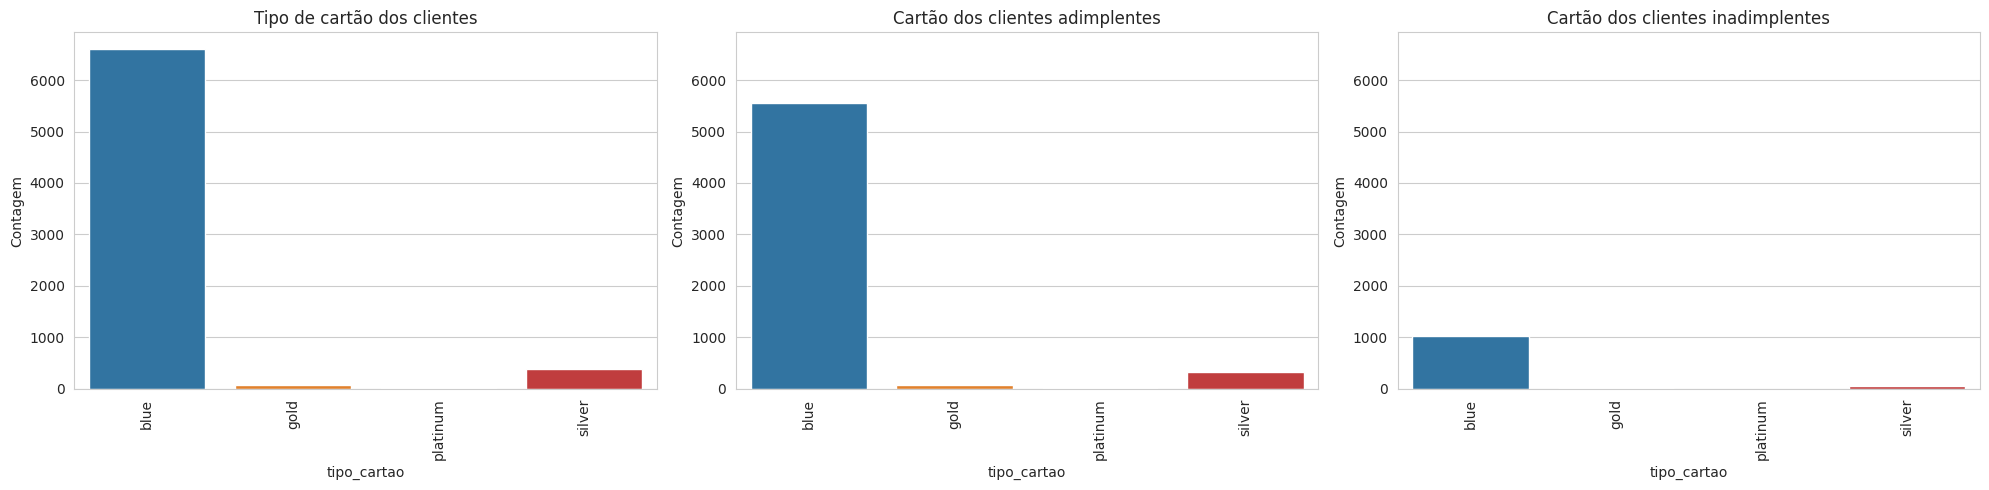

In [59]:
#anpalisando a frequencia por tipo de cartão

plotar_coluna(
    coluna='tipo_cartao',
    dfs=[df, df_adimplentes, df_inadimplentes],
    titulos=[
        'Tipo de cartão dos clientes',
        'Cartão dos clientes adimplentes',
        'Cartão dos clientes inadimplentes'
    ]
)


In [60]:

total_por_cartao = df['tipo_cartao'].value_counts()
inadimplentes_por_cartao = df[df['default'] == 1]['tipo_cartao'].value_counts()

tabela = pd.DataFrame({
    'Total': total_por_cartao,
    'Inadimplentes': inadimplentes_por_cartao
})

tabela.fillna(0, inplace=True)
tabela['% Inadimplentes'] = (tabela['Inadimplentes'] / tabela['Total']) * 100
tabela['% Inadimplentes'] = tabela['% Inadimplentes'].round(2).astype(str) + '%'
tabela.sort_values(by='Inadimplentes', ascending=False, inplace=True)
tabela



,Total,Inadimplentes,% Inadimplentes
tipo_cartao,,,
blue,6598,1034,15.67%
silver,391,63,16.11%
gold,81,13,16.05%
platinum,11,3,27.27%


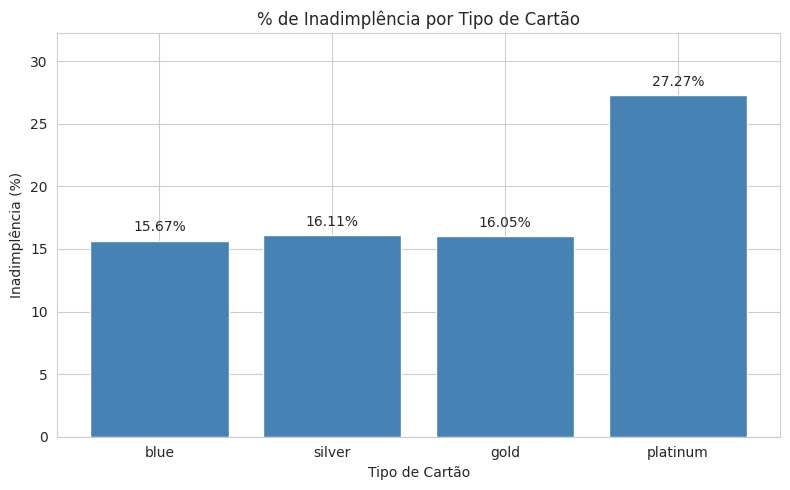

In [61]:
import matplotlib.pyplot as plt

tabela['% Num'] = (tabela['Inadimplentes'] / tabela['Total']) * 100

plt.figure(figsize=(8, 5))
plt.bar(tabela.index, tabela['% Num'], color='steelblue')

plt.title('% de Inadimplência por Tipo de Cartão')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Inadimplência (%)')

for i, v in enumerate(tabela['% Num']):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.ylim(0, tabela['% Num'].max() + 5)
plt.tight_layout()
plt.show()

#Apesar do gold ser o maior em volume, percebemos que 27% dos clientes platinum estão inadimplente, o que é um valor bem representativo

### Conclusão: Aqui, percebemos que a quantidade de clientes inadimplentes se concentra no tipo de cartão Blue, porém, quando vamos olhar a proporção de quantidade de inadimplentes VS a quantidade de clientes na categoria,vemos que o quase 30% dos clientes Platinum são inadimplentes, representando quase o dobro dos outros. 

## Teste 2 - Inadimplencia por quantidade de transação

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


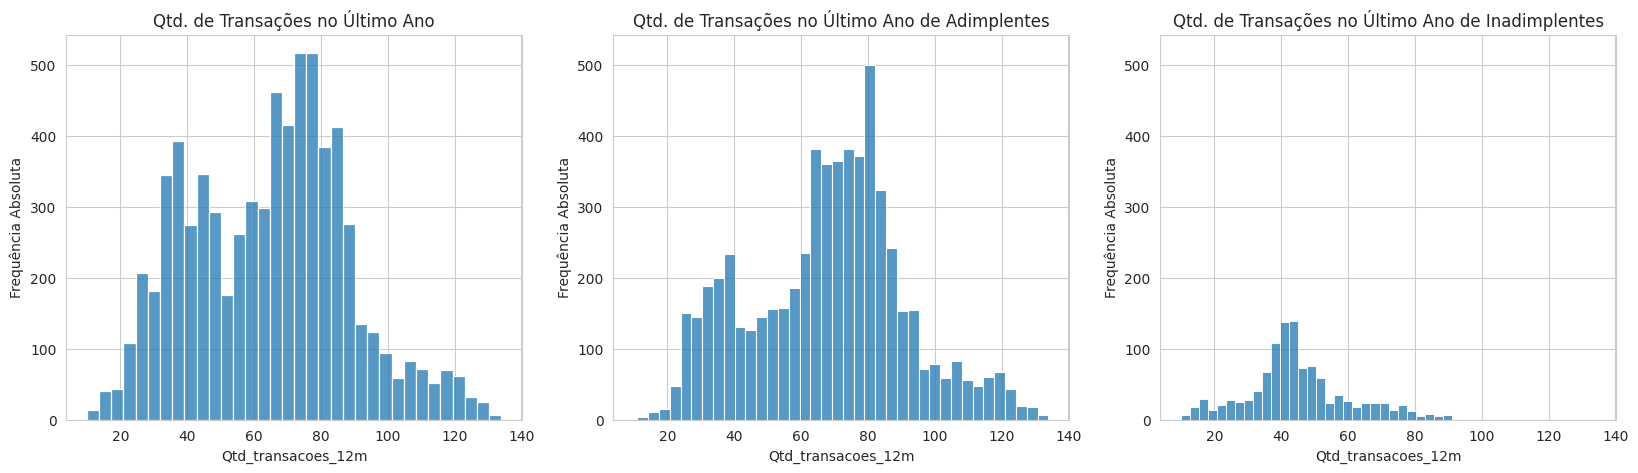

In [62]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:
    
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()



In [63]:
display(df_inadimplentes.head(5))

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
21,708508758,1,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
51,779471883,1,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
54,714374133,1,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
61,712030833,1,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15
127,720201033,1,53,M,2,mestrado,casado,$80K - $120K,blue,41,3,2,3,11669.07,720.82,23


## Teste 3 - Inadimplencia por Valor de transação

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


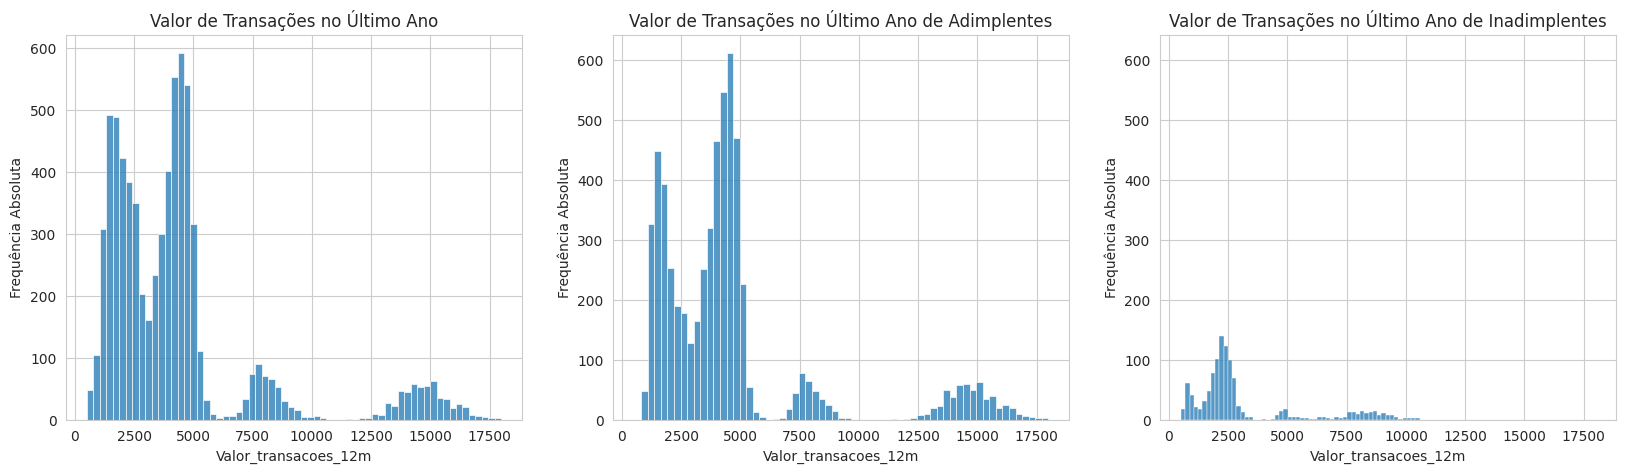

In [64]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações no Último Ano', 'Valor de Transações no Último Ano de Adimplentes', 'Valor de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:
    
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

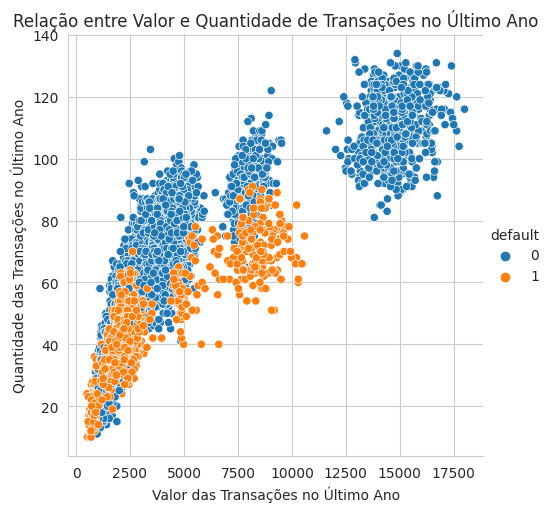

In [65]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


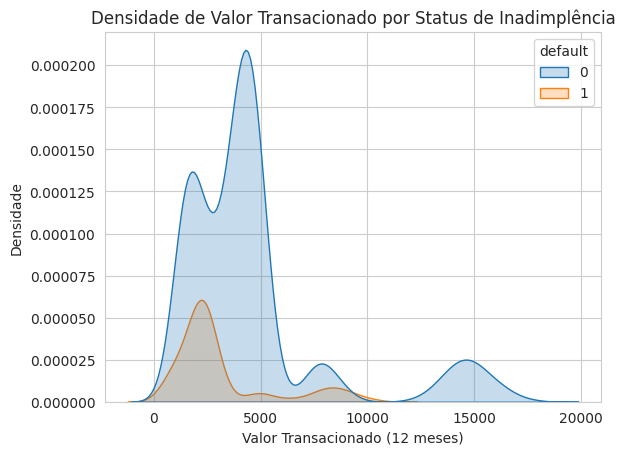

In [66]:
sns.kdeplot(data=df, x='valor_transacoes_12m', hue='default', fill=True)
plt.title('Densidade de Valor Transacionado por Status de Inadimplência')
plt.xlabel('Valor Transacionado (12 meses)')
plt.ylabel('Densidade')
plt.show()


# A densidade de clientes inadimplentes fica concentrada nos limites de 1.000 a 10.000, reforçando a informação anterior que a maioria das inadimplencia acontece nas transações menores

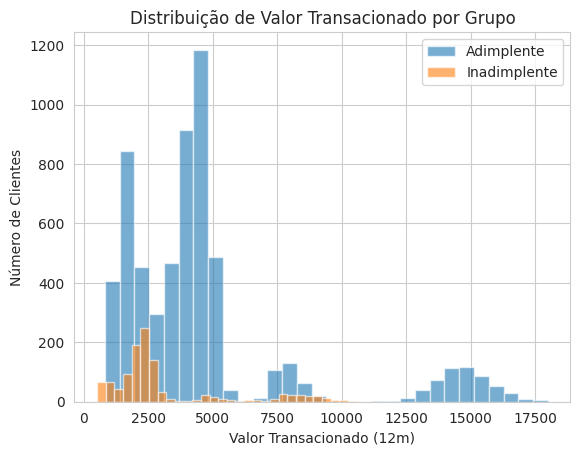

In [67]:
plt.hist(df[df['default'] == 0]['valor_transacoes_12m'], bins=30, alpha=0.6, label='Adimplente')
plt.hist(df[df['default'] == 1]['valor_transacoes_12m'], bins=30, alpha=0.6, label='Inadimplente')
plt.legend()
plt.title('Distribuição de Valor Transacionado por Grupo')
plt.xlabel('Valor Transacionado (12m)')
plt.ylabel('Número de Clientes')
plt.show()



#Confrome mostra o grafico, clientes inadimplentes, geralmente,se concentram em transações menores

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='limite_credito', ylabel='Density'>

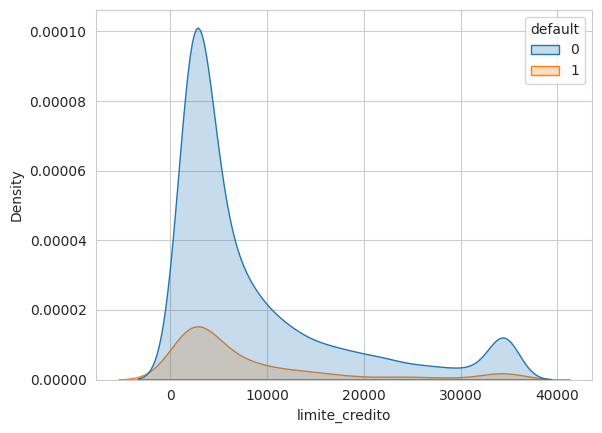

In [68]:
sns.kdeplot(data=df, x='limite_credito', hue='default', fill=True)


#A maior parte dos clientes inadimplentes tem um limite de credito menor

<Axes: xlabel='default', ylabel='qtd_transacoes_12m'>

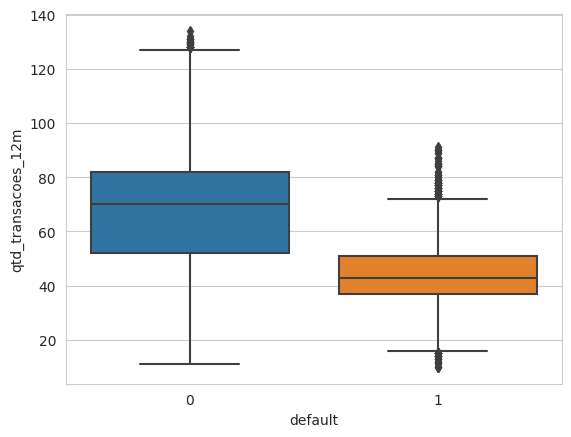

In [69]:
sns.boxplot(x='default', y='qtd_transacoes_12m', data=df)

#Aqui, podemos ver que clientes inadimplentes costumam fazer uma quantidade menor de transações no ano

Conclusões Finais

A análise exploratória dos dados permitiu identificar padrões claros entre clientes adimplentes e inadimplentes:

- **Volume de transações**: Clientes inadimplentes tendem a realizar menos transações ao longo do ano. Isso foi observado tanto nos histogramas quanto no boxplot da variável `qtd_transacoes_12m`.

- **Valor movimentado**: A inadimplência é mais frequente entre clientes que transacionam valores mais baixos. Os gráficos de densidade e distribuição indicam que clientes que movimentam acima de R$ 10.000 têm uma taxa de inadimplência significativamente menor.

- **Engajamento com o cartão**: A análise conjunta de valor e quantidade de transações demonstra que clientes inadimplentes estão concentrados nas faixas de menor uso, o que pode indicar menor engajamento com o serviço financeiro.

- **Limite de crédito**: Clientes com menor limite de crédito apresentam maior frequência de inadimplência. Já aqueles com limites elevados aparecem majoritariamente como adimplentes.
